In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [91]:
# data folder
data_folder = '../data/upwind_neurons/ss33917/'
# find all blocks in the data folder
blocks = [f for f in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, f)) and f.startswith('Block')]
# sort blocks
blocks.sort()
# loop through all blocks and find all trials
data = {}
for block in blocks:
    trials = [f for f in os.listdir(os.path.join(data_folder, block)) if os.path.isdir(os.path.join(data_folder, block, f)) and f.startswith('Trial')]
    # sort trials
    trials.sort()
    # loop through all trials and find all files
    for trial in trials:
        subfolders = [f for f in os.listdir(os.path.join(data_folder, block, trial)) if os.path.isdir(os.path.join(data_folder, block, trial, f))]
        # loop through all subfolders and find all fly folders
        for subfolder in subfolders:
            fly_folders = [f for f in os.listdir(os.path.join(data_folder, block, trial, subfolder)) if os.path.isdir(os.path.join(data_folder, block, trial, subfolder, f))]
            # loop through all fly folders and find all csv files
            for fly_folder in fly_folders:
                csv_files = [f for f in os.listdir(os.path.join(data_folder, block, trial, subfolder, fly_folder)) if f.endswith('.csv')]
                # loop through all csv files and load them
                for csv_file in csv_files:
                    # load csv file
                    df = pd.read_csv(os.path.join(data_folder, block, trial, subfolder, fly_folder, csv_file), index_col=0)
                    # add block and trial to dataframe
                    df['block'] = int(block.split('Block_')[-1])
                    df['trial'] = int(trial.split('Trial_')[-1])
                    # add trial state markers to dataframe
                    df.loc[df.time<20, 'state'] = 'Pre Stim'
                    df.loc[(df.time>=20)&(df.time<35), 'state'] = 'CS+ Odor'
                    df.loc[(df.time>=35)&(df.time<50), 'state'] = 'CS+ Odor+LED'
                    df.loc[(df.time>=50)&(df.time<70), 'state'] = 'Post CS+'
                    df.loc[(df.time>=70)&(df.time<85), 'state'] = 'CS- Initial'
                    df.loc[(df.time>=85)&(df.time<100), 'state'] = 'CS- Later'
                    df.loc[df.time>=100, 'state'] = 'Post CS-'
                    # store data
                    fly_id = int(fly_folder.split('fly')[-1])
                    if fly_id not in data:
                        data[fly_id] = []
                    data[fly_id].append(df)

In [92]:
def calculate_displacement_vector(df,state='CS+ Odor'):
    # calculate displacement
    x = df['x'][df.state==state].values
    y = df['y'][df.state==state].values
    # subtract first value from all other values
    x = x - x[0]
    y = y - y[0]
    # get final displacement
    x = x[-1]
    y = y[-1]
    # convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return r,theta

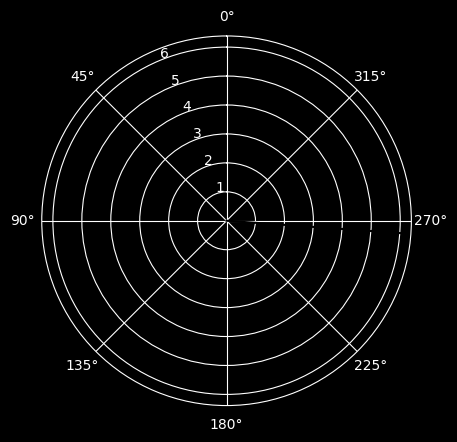

In [93]:
r,theta = calculate_displacement_vector(data[1][0])
plt.subplot(1,1,1,projection='polar')
plt.plot([0,theta],[0,r],'-',color='black')
# point zero upwards
plt.gca().set_theta_zero_location('N')
plt.show()

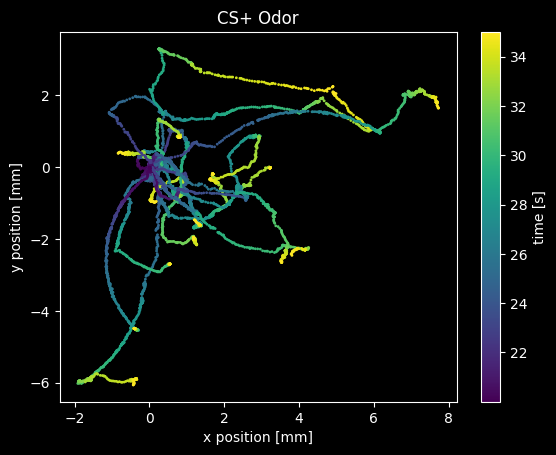

In [94]:
# plot the data
plt.figure()
for i in range(len(data[1])):
    test_data = data[1][i]
    cs_plus= test_data[test_data['state']=='CS+ Odor']
    plt.scatter(cs_plus['x'] - cs_plus['x'].iloc[0], cs_plus['y'] - cs_plus['y'].iloc[0], c=cs_plus['time'], cmap='viridis', s=1)
plt.colorbar(label='time [s]')
plt.xlabel('x position [mm]')
plt.ylabel('y position [mm]')
plt.title('CS+ Odor')
plt.show()

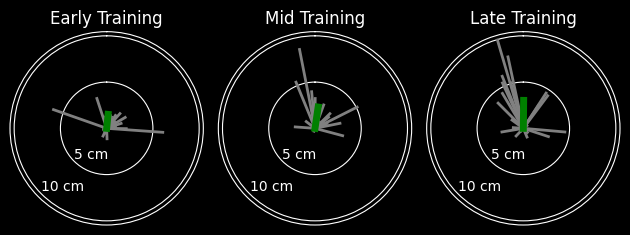

In [111]:
# plot the displacement vector (polar plot)
# make it black background with white plot
plt.style.use('dark_background')
fig, ax = plt.subplots(1,3,subplot_kw=dict(polar=True),sharex=True,sharey=True)
# loop through all flies
for i in range(3):
    # store average displacement vector
    rs = []
    thetas = []
    for fly_id in data:
    # run for three blocks
        # loop through all trials in the block
        for trial in range(len(data[fly_id])//3):
            # get the data
            test_data = data[fly_id][i*len(data[fly_id])//3 + trial]
            # calculate displacement vector
            r,theta = calculate_displacement_vector(test_data)
            rs.append(r)
            thetas.append(theta)
            # plot a arrow from the origin to the displacement
            ax[i].plot([0,theta],[0,r],'-',color='gray',linewidth=2)
    # plot the average displacement vector
    r = np.mean(rs)
    theta = np.mean(thetas)
    ax[i].plot([0,theta],[0,r],'-',color='green',linewidth=5)
    if i==0:
        ax[i].set_title('Early Training')
    elif i==1:
        ax[i].set_title('Mid Training')
    else:
        ax[i].set_title('Late Training')
    ax[i].set_theta_zero_location('N')
for i in range(3):
    # set radial tick labels
    ax[i].set_rlabel_position(135)
    ax[i].set_rticks([5,10], labels=['5 cm','10 cm'])
    # set angular tick labels
    ax[i].set_xticks(np.linspace(0,2*np.pi,4,endpoint=False))   # 4 ticks
    ax[i].set_xticklabels(['','','',''])
    # show only radial grid not angular grid
    ax[i].grid(axis='x')

plt.tight_layout()
plt.show()
    #

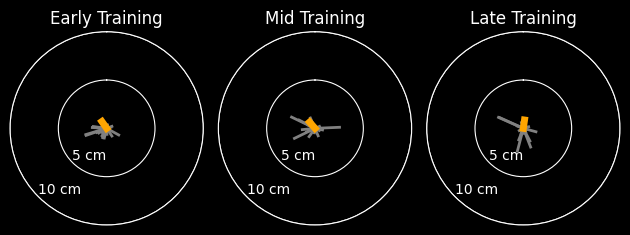

In [112]:
# plot the displacement vector (polar plot)
# make it black background with white plot
plt.style.use('dark_background')
fig, ax = plt.subplots(1,3,subplot_kw=dict(polar=True),sharex=True,sharey=True)
# loop through all flies

for i in range(3):
    # store average displacement vector
    rs = []
    thetas = []
    # loop through all trials in the block
    for fly_id in data:
    # run for three blocks
        for trial in range(len(data[fly_id])//3):
            # get the data
            test_data = data[fly_id][i*len(data[fly_id])//3 + trial]
            # calculate displacement vector
            r,theta = calculate_displacement_vector(test_data,state='CS- Initial')
            rs.append(r)
            thetas.append(theta)
            # plot a arrow from the origin to the displacement
            ax[i].plot([0,theta],[0,r],'-',color='gray',linewidth=2)
    # plot the average displacement vector
    r = np.mean(rs)
    theta = np.mean(thetas)
    ax[i].plot([0,theta],[0,r],'-',color='orange',linewidth=5)
    if i==0:
        ax[i].set_title('Early Training')
    elif i==1:
        ax[i].set_title('Mid Training')
    else:
        ax[i].set_title('Late Training')
    ax[i].set_theta_zero_location('N')
for i in range(3):
    # set radial tick labels
    ax[i].set_rlabel_position(135)
    ax[i].set_rticks([5,10], labels=['5 cm','10 cm'])
    # set angular tick labels
    ax[i].set_xticks(np.linspace(0,2*np.pi,4,endpoint=False))   # 4 ticks
    ax[i].set_xticklabels(['','','',''])
    # show only radial grid not angular grid
    ax[i].grid(axis='x')

plt.tight_layout()
plt.show()
    #